In [1]:

import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

df = pandas.read_csv('data/reviews.csv', parse_dates=['Timestamp'])
df.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


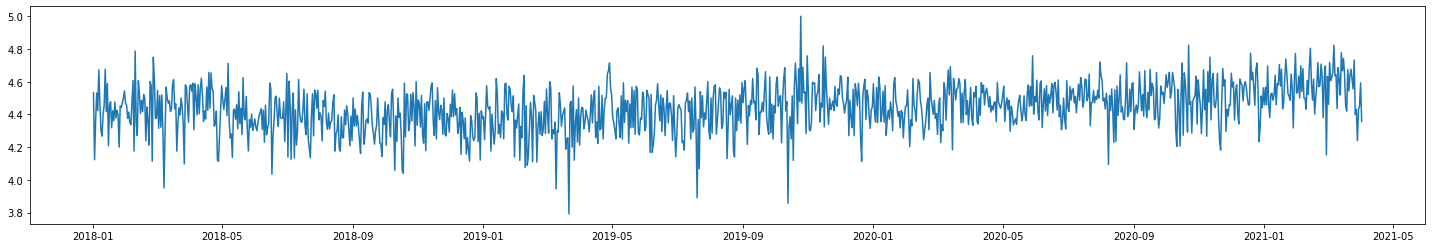

In [2]:
df['Day'] = df['Timestamp'].dt.date
day_average = df.groupby(['Day']).mean()
plt.figure(figsize=(25, 4))
plt.plot(day_average.index, day_average['Rating'])

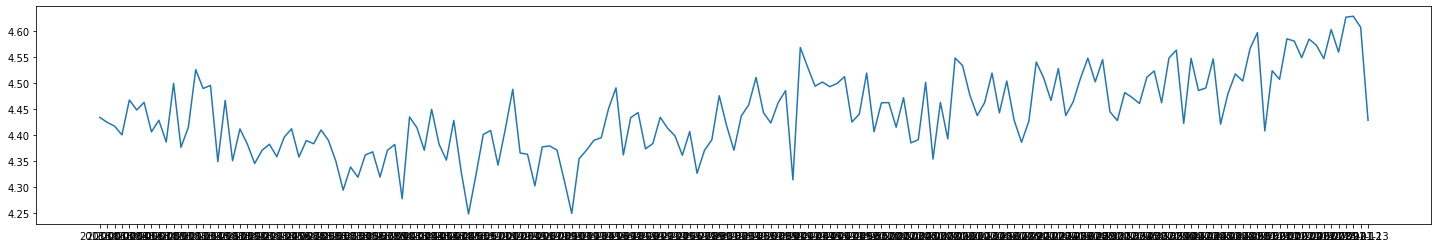

In [3]:
df['Week'] = df['Timestamp'].dt.strftime('%Y-%U')
week_average = df.groupby(['Week']).mean()
plt.figure(figsize=(25, 4))
plt.plot(week_average.index, week_average['Rating'])

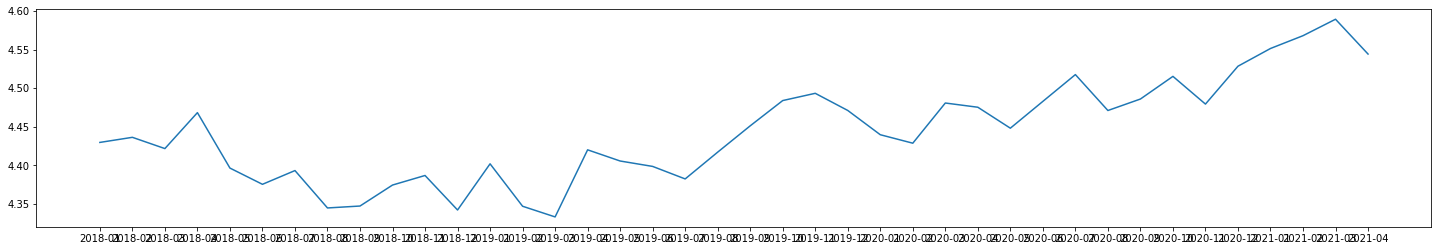

In [4]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
month_average = df.groupby(['Month']).mean()
plt.figure(figsize=(25, 4))
plt.plot(month_average.index, month_average['Rating'])

## Avg rating by month by course

<AxesSubplot:xlabel='Month'>

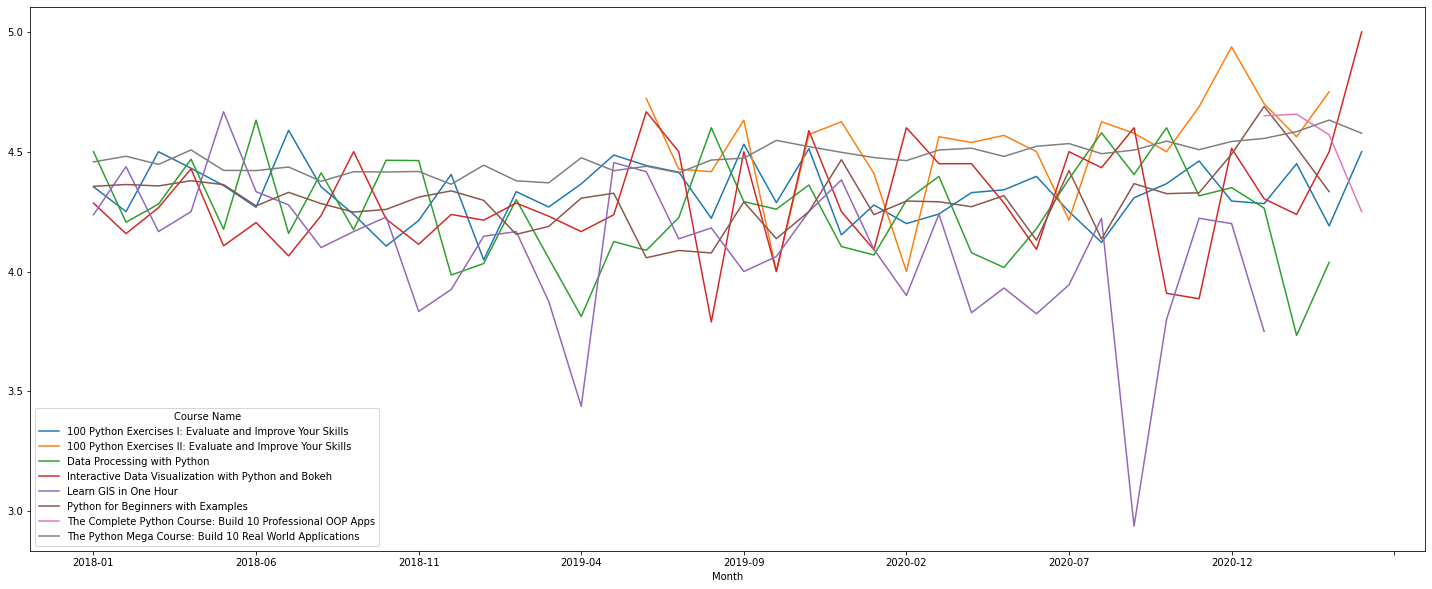

In [8]:
df['Month'] = df['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = df.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()
month_average_crs.plot(figsize=(25, 10))

### What people are the happiest

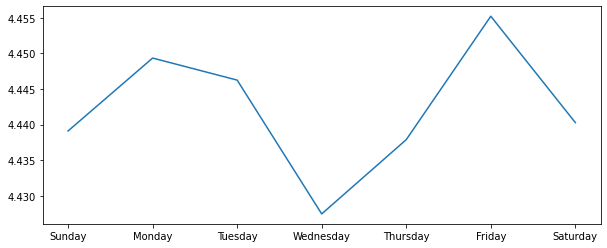

In [20]:
df['Weekday'] = df['Timestamp'].dt.strftime('%A')
df['Daynumber'] = df['Timestamp'].dt.strftime('%w')
weekday_avg = df.groupby(['Weekday', 'Daynumber']).mean()
weekday_avg = weekday_avg.sort_values('Daynumber')

plt.figure(figsize=(10, 4))
plt.plot(weekday_avg.index.get_level_values(0), weekday_avg['Rating'])


([<matplotlib.patches.Wedge at 0x128302310>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354248, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

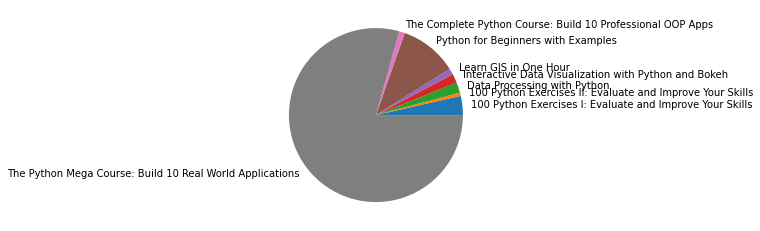

In [24]:
share = df.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels=share.index)